## Question 3

For the error estimate, what I did is that for every value of T interpolated, I looked for the closest value of T in the data points and computed the difference betweem the two of them. The function lakeshore() returns the interpolated temperatures and the root mean squared error of the differences.

In [22]:
# Question 3

import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

data = np.loadtxt('lakeshore.txt')

def lakeshore(V, data):
    ''' 
    data = input data set of temperature vs voltage
    V = voltages you want to know the temperature of (between 0.090681 and 1.644390)

    Function does a cubic spline on the data and returns the interpolated temperature and the estimated root
    mean squared error
    '''
    
    data = data[::-1] # sort in ascending order of voltage
    V_data = data[:,1]
    T_data = data[:,0]

    # Let's do a cubic spline using scipy

    # interpolate.splrep estimates a cubic spline approximation on (x,y)
    spline = interpolate.splrep(V_data,T_data)
    # interpolate.splev returns the spline evaluated at the points given
    T = interpolate.splev(V, spline)

    # estimate of error: take difference between returned interpolated value and the closest data point for temperature
    err = np.array([])
    for i in range(len(T)):
        all_diff = np.abs(T_data - T[i])
        min_diff = np.min(all_diff)

        err = np.append(err,min_diff)
    rmse = np.sqrt(np.mean(err)**2)
    return T, rmse
    


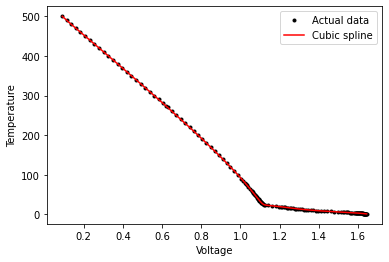

The (very rough) error estimate is: 1.5498786095218726
Doesnt look like a bad interpolation at all!


In [23]:
# test of lakeshore(V, data)

test = np.loadtxt('lakeshore.txt')
test = test[::-1]
V_test = test[:,1]
T_test = test[:,0]

VV_test = np.linspace(V_test[0], V_test[-1], 2000)
test1 = test = np.loadtxt('lakeshore.txt')
TT_test = lakeshore(VV_test, test1)[0]

plt.plot(V_test, T_test, 'k.', label = 'Actual data')
plt.plot(VV_test, TT_test, 'r', label = 'Cubic spline')
plt.xlabel('Voltage')
plt.ylabel('Temperature')
plt.legend(loc = 'best')
plt.show()
print('The (very rough) error estimate is:', lakeshore(VV_test, test1)[1])
print('Doesnt look like a bad interpolation at all!')